In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## Загрузка аудио файла

In [2]:
speech_file = "audio/man_speech.wav"

Прослушаем исходный аудио файл:

In [3]:
ipd.Audio(speech_file)

Загрузим аудио файл с помощью librosa:

In [4]:
y, sr = librosa.load(speech_file)
print('Audio Length:', len(y))
print('Sampling Rate:', sr)

Audio Length: 189440
Sampling Rate: 22050


## Вычисление MFCC

Чтобы вычислить MFCC нужно:
<ol>
  <li>Применить к сигналу ДПФ.</li>
  <li>Сделать спектр логарифмически-амплитудным.</li>
  <li>Использовать Мел-шкалу.</li>
  <li>Применить дискретное косинусное преобразование.</li>
</ol>
Librosa поможет нам в этом.

In [5]:
mfccs = librosa.feature.mfcc(y=y, n_mfcc=13, sr=sr)

n_mfcc — количество MFCC обычно равно 12 или 13.

In [6]:
mfccs.shape

(13, 371)

Визуализируем MFCC:

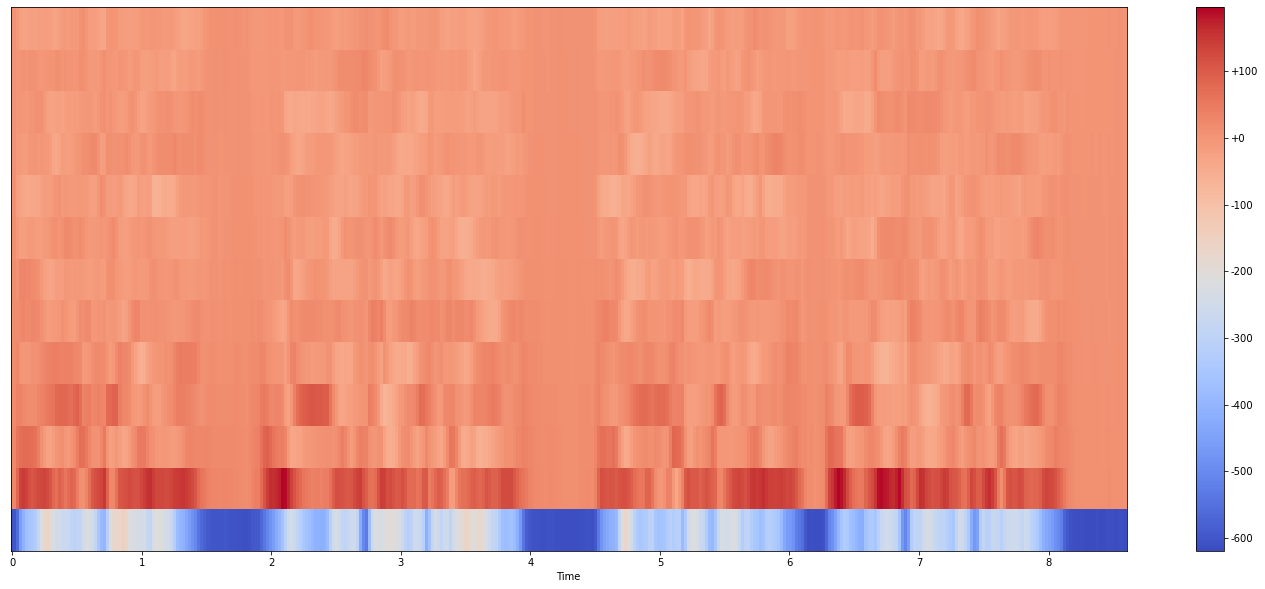

In [7]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Вычисление первой/второй производных MFCC

Первая производная:

In [8]:
delta_mfccs = librosa.feature.delta(mfccs)

In [9]:
delta_mfccs.shape

(13, 371)

Визуализируем первую производную:

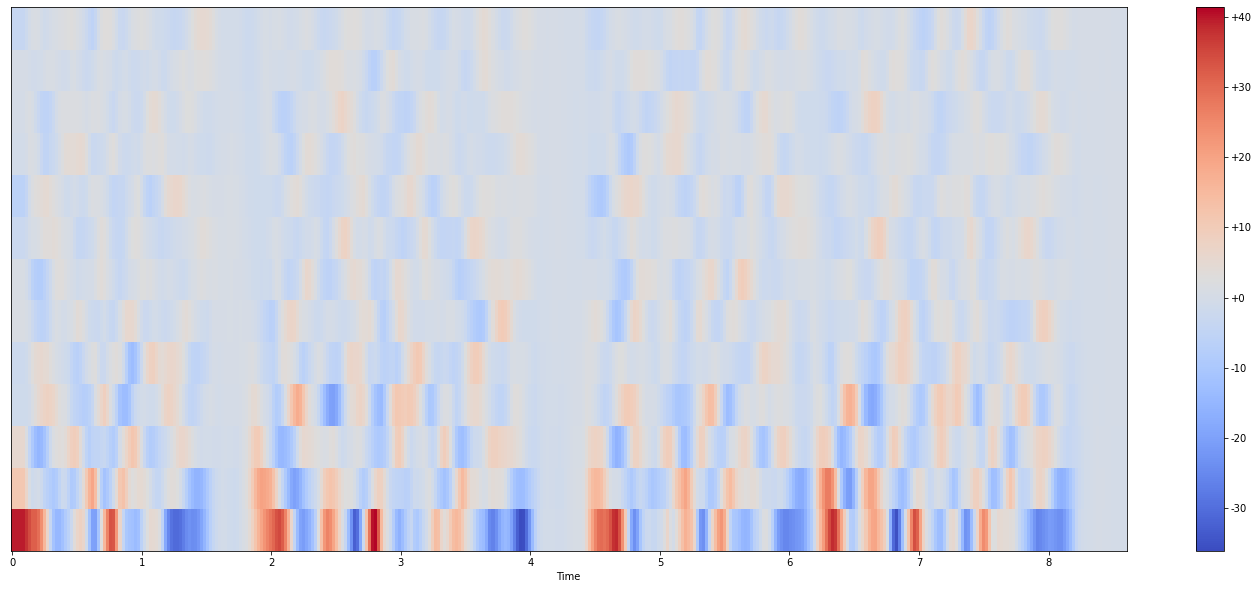

In [10]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

Вторая производная:

In [11]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [12]:
delta2_mfccs.shape

(13, 371)

Визуализируем вторую производную:

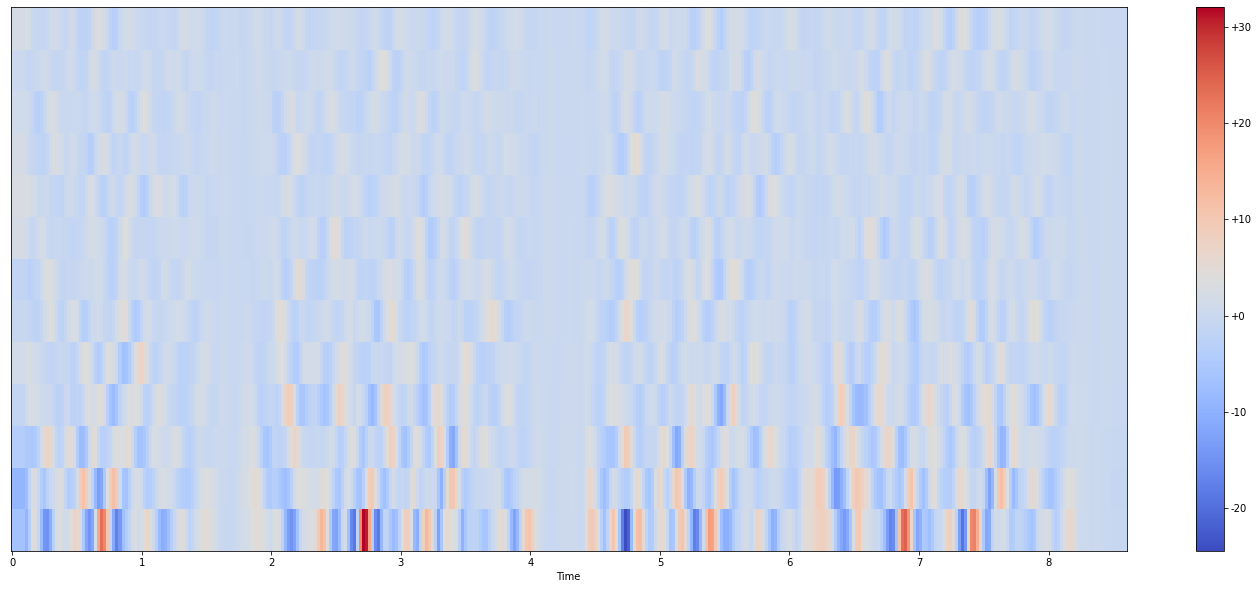

In [13]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

Объединим особенности mfcc (коэффициенты, первая и вторая производные):

In [14]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [15]:
mfccs_features.shape

(39, 371)

Визуализируем:

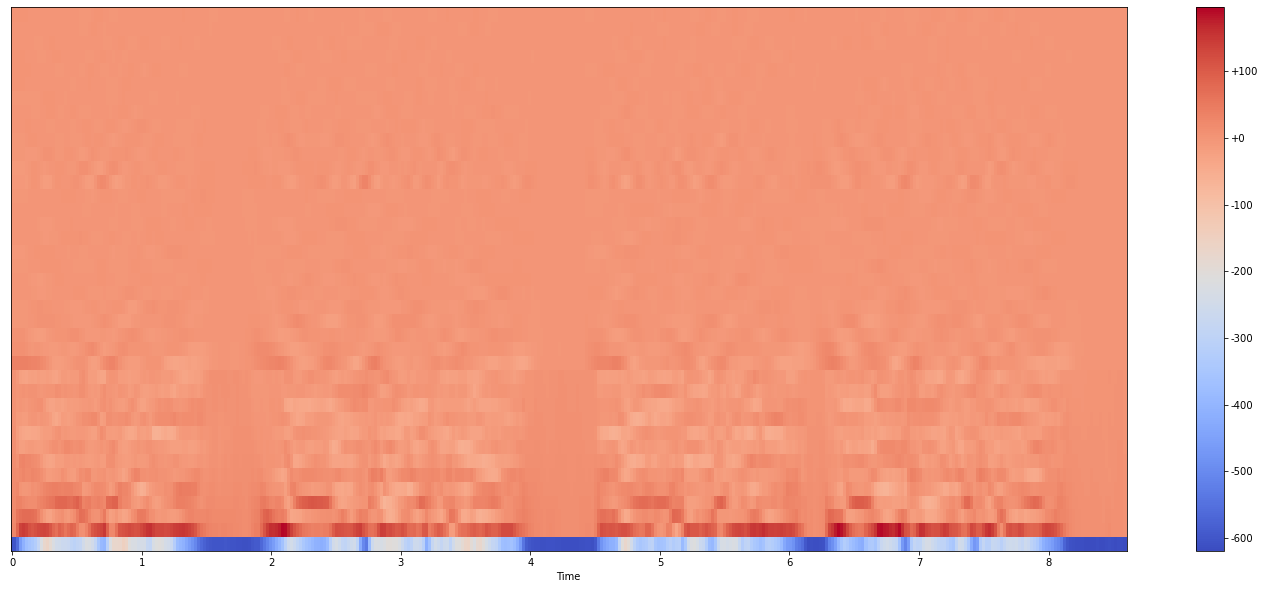

In [16]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs_features, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()